<a href="https://colab.research.google.com/github/riddhimanroy1010/flame_us_python_port/blob/main/R2py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All python imports are handled here

In [3]:
pip install rpy2

In [4]:
pip install rdata

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rpy2.robjects import r
import rpy2.robjects.pandas2ri as pandas2ri
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
#Import the SignatureTranslatedAnonymousPackage 
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage as STAP

#Importing a converter from R to pandas for data processing
from rpy2.robjects.conversion import localconverter

Working to install all necessary R packages

In [6]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

packnames = ('readxl', 'reshape2', 'tidyr', 'stringr')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

Making the flame_us_code folder the current working directory

In [7]:
%cd /content/drive/My\ Drive/flame_us_code

/content/drive/My Drive/flame_us_code


Verifying the current working folder: you should expect to see /content/drive/MyDrive/flame_us_code

In [8]:
!pwd

/content/drive/My Drive/flame_us_code


Initializing the model

In [10]:
robjects.r.source("model_setup.R")
robjects.r.source("load_functions.R")

R[write to console]: 
Attaching package: ‘tidyr’


R[write to console]: The following object is masked from ‘package:reshape2’:

    smiths




value,[RTYPES.NILSXP]
visible,[RTYPES.LGLSXP]


In [11]:
with open('functions/fleet_vkt_f.R', 'r') as fleet_vkt:
  fleet_vkt_func = fleet_vkt.read()


fun_res = STAP(fleet_vkt_func, "fleet_vkt_f.R")
fleet_vkt_res = fun_res.fleet_vkt_f()
print(fleet_vkt_res[1])


           Size Technology Year        Value
1           Car     BEV100 2015 4.090991e+09
2   Light truck     BEV100 2015 2.765703e+08
3           Car     BEV300 2015 1.479290e+09
4   Light truck     BEV300 2015 1.242802e+08
5           Car        CNG 2015 2.486660e+09
6   Light truck        CNG 2015 4.686652e+09
7           Car        FCV 2015 3.593465e+07
8   Light truck        FCV 2015 4.140962e+07
9           Car        FFV 2015 6.055367e+10
10  Light truck        FFV 2015 3.031501e+11
11          Car        HEV 2015 6.289783e+10
12  Light truck        HEV 2015 9.222674e+09
13          Car     ICEV-D 2015 1.888053e+10
14  Light truck     ICEV-D 2015 7.348002e+09
15          Car     ICEV-G 2015 1.898399e+12
16  Light truck     ICEV-G 2015 1.905725e+12
17          Car     PHEV20 2015 2.692597e+09
18  Light truck     PHEV20 2015 2.804911e+08
19          Car     PHEV40 2015 2.274330e+09
20  Light truck     PHEV40 2015 2.228721e+08
21          Car     BEV100 2016 4.180377e+09
22  Light 

In [12]:
with open('functions/survival_rate_f.R', 'r') as survival_rates:
  survival_rate_func = survival_rates.read()


fun_res = STAP(survival_rate_func, "survival_rate_f.R")
fleet_vkt_res = fun_res.survival_rate_f(year=2015, size="Car")
print(fleet_vkt_res)

                       1        2         3         4         5         6
Survival rates 0.9854427 0.990688 0.9909146 0.9799573 0.9571519 0.9520456
                       7         8         9        10        11        12
Survival rates 0.9466068 0.9419456 0.9364944 0.9309828 0.9245332 0.9189899
                      13        14       15        16        17        18
Survival rates 0.9125795 0.9088968 0.899738 0.8997261 0.8905697 0.8813821
                      19        20        21        22        23        24
Survival rates 0.8721579 0.8722003 0.8611831 0.8574805 0.8455649 0.8198755
                      25        26        27        28        29        30
Survival rates 0.8198518 0.8198933 0.8198926 0.8198929 0.8199063 0.8199097



<class 'rpy2.robjects.vectors.FloatMatrix'>
<class 'numpy.ndarray'>
[[0.98544267 0.99068798 0.99091455 0.97995727 0.95715194 0.95204562
  0.94660681 0.94194559 0.93649443 0.93098278 0.92453324 0.91898991
  0.9125795  0.90889685 0.899738   0.89972606 0.89056967 0.88138206
  0.87215786 0.87220034 0.86118308 0.85748049 0.84556486 0.81987555
  0.81985182 0.81989332 0.81989259 0.8198929  0.81990627 0.81990967]]
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
 [1] "Survival rates"

                       1         2         3  ...        28        29       30
Survival rates  0.985443  0.990688  0.990915  ...  0.819893  0.819906  0.81991

[1 rows x 30 columns]


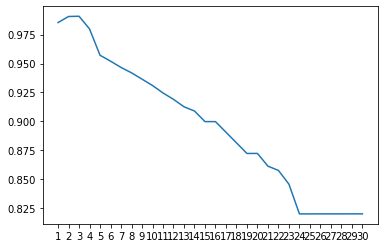

In [28]:
print(type(fleet_vkt_res))

fleet_vkt_res_dt = pandas2ri.ri2py_vector(fleet_vkt_res)
print(type(fleet_vkt_res_dt))
print(fleet_vkt_res_dt)
colnames = fleet_vkt_res.colnames
rownames = fleet_vkt_res.rownames
print(colnames, rownames)
fleet_vkt_res_pd_dt = pd.DataFrame(fleet_vkt_res_dt, columns=colnames, index=rownames)
print(fleet_vkt_res_pd_dt)
plt.plot(colnames, fleet_vkt_res_dt[0])